In [1]:
from dataloader import EmbeddingsDataloader
from torch.utils.data import DataLoader
from torch.nn.functional import one_hot
from model import *
import matplotlib.pyplot as plt
import torch
from tqdm.auto import tqdm
import time
import numpy as np
import copy
from train import run_training, Run

c:\Users\nataxcan\miniconda3\envs\compviz2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# # sample run
# r = Run()
# losses, test_accs, best_model = r.run_experiment()
# r.plot_results()

In [3]:
import itertools

# this is a simple experiment to see if there is a link
# between model capacity and performance
models = [
    SingleLayerPerceptron,
]
widths = [
    1,
    64,
]
combinations = list(itertools.product(models, widths))
number_of_experiments_to_average_over = 3
raw_results = []
results = []

for i, elems in tqdm(enumerate(combinations), total=len(combinations), desc='combinations progress'):
    raw_results.append([])
    losses_sum = None
    test_accs_sum = None
    for j in range(number_of_experiments_to_average_over):
        # run the experiment
        model, width = elems
        r = Run(model=model, frames_per_datapoint=width, epochs=2*width)
        losses, test_accs, best_model = r.run_experiment()
        torch.save(best_model, f'best_model_exp{j}_{str(model)}_{str(width)}.save')
        # sum the results (for averaging later)
        raw_results.append((max(test_accs), losses, test_accs, str((model, width))))
        if isinstance(losses_sum, type(None)):
            losses_sum = np.array(losses)
            test_accs_sum = np.array(test_accs)
        else:
            losses_sum += np.array(losses)
            test_accs_sum += np.array(test_accs)
    # average the results
    avg_losses = losses_sum / number_of_experiments_to_average_over
    avg_test_accs = test_accs_sum / number_of_experiments_to_average_over
    results.append((max(avg_test_accs), str(elems), str(model), width, avg_losses, avg_test_accs))
    print(i, elems, 'done')

# which combination gave the best average performance?
results.sort()
[print(R[:4]) for R in results]
pass

combinations progress:   0%|          | 0/2 [00:00<?, ?it/s]

combinations progress:   0%|          | 0/2 [00:07<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
import numpy as np
import colorsys
from matplotlib import colors

def get_shades(color, n):
    color = colors.to_rgba(color)
    hsv_color = np.array(colorsys.rgb_to_hsv(*color[:3]))
    step = hsv_color[2] / (n + 1)
    shades = [(*colorsys.hsv_to_rgb(*(hsv_color * (1, 1, i * step))), color[3]) for i in range(1, n+1)]
    return shades

n = 5
print("Colour shades:", get_shades('red', n))

Colour shades: [(0.16666666666666666, 0.0, 0.0, 1.0), (0.3333333333333333, 0.0, 0.0, 1.0), (0.5, 0.0, 0.0, 1.0), (0.6666666666666666, 0.0, 0.0, 1.0), (0.8333333333333333, 0.0, 0.0, 1.0)]


In [ ]:
[print(r[2:4], round(r[0], 2)) for r in results]
pass

("<class 'model.SingleLayerPerceptron'>", 1) 0.71
("<class 'model.SingleLayerPerceptron'>", 2) 0.71
("<class 'model.SingleLayerPerceptron'>", 4) 0.7
("<class 'model.SingleLayerPerceptron'>", 8) 0.73
("<class 'model.SingleLayerPerceptron'>", 16) 0.74
("<class 'model.SingleLayerPerceptron'>", 32) 0.78
("<class 'model.SingleLayerPerceptron'>", 64) 0.79
("<class 'model.MultiLayerPerceptron2'>", 1) 0.57
("<class 'model.MultiLayerPerceptron2'>", 2) 0.57
("<class 'model.MultiLayerPerceptron2'>", 4) 0.57
("<class 'model.MultiLayerPerceptron2'>", 8) 0.58
("<class 'model.MultiLayerPerceptron2'>", 16) 0.58
("<class 'model.MultiLayerPerceptron2'>", 32) 0.57


In [ ]:
with open('nlayer_perceptron_comparison_data.pickle', 'wb+') as f:
    import pickle
    pickle.dump(results, f)

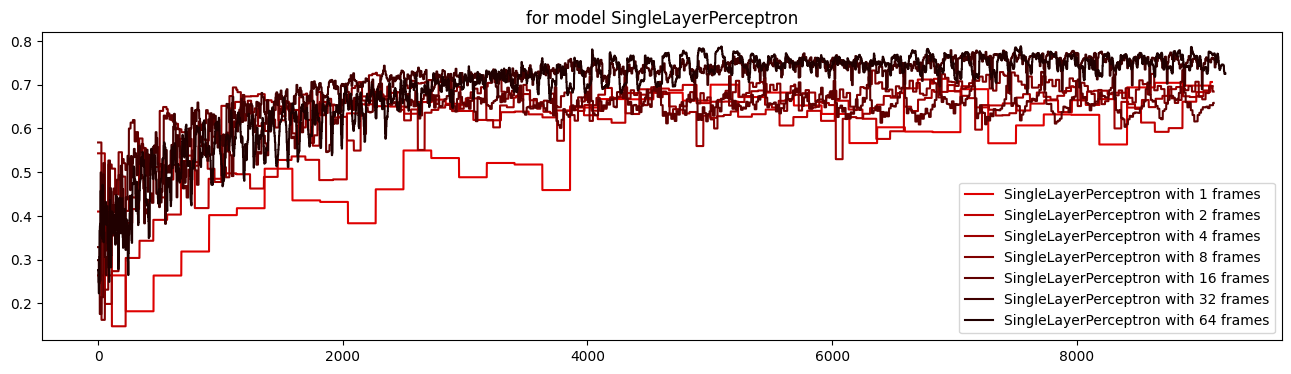

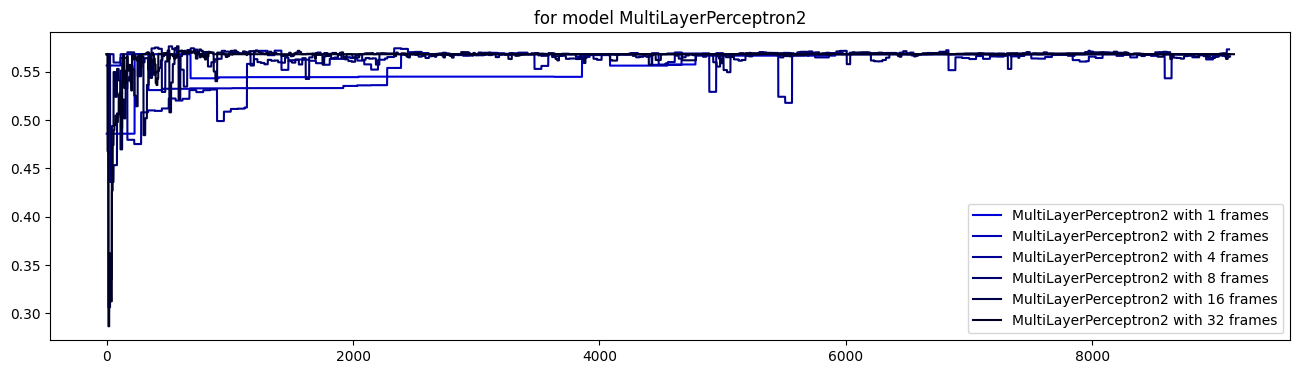

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


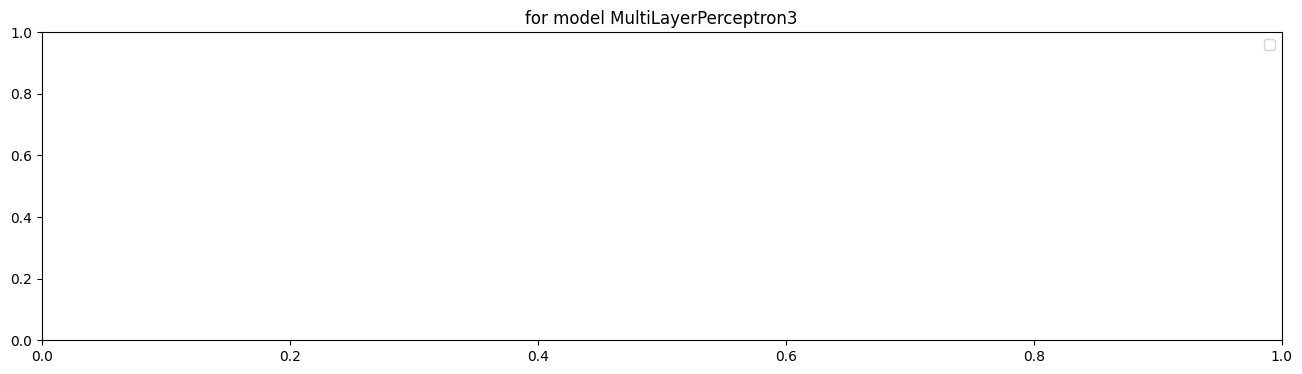

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


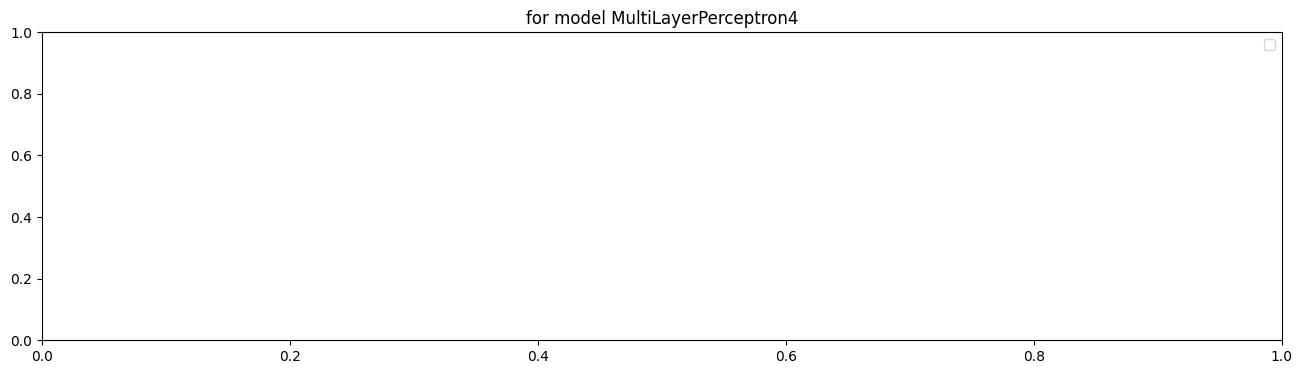

In [ ]:
model_colors = ['red', 'blue', 'green', 'purple', 'orange']
for color, model in zip(model_colors, models):
    model_name = str(model)
    model_name_stripped = model_name.split("'")[1].split('.')[1]
    results_model = [elem for elem in results if model_name in elem[1]]
    results_model.sort(key=lambda x: x[3]) # sort by increasing number of frames
    shades = get_shades(color, len(results_model))
    plt.figure(figsize=(16, 4))
    for acc, nframes in [(x[5], x[3]) for x in results_model]:
        plt.plot(range(len(acc)), acc, label=f"{model_name_stripped} with {nframes} frames", color=shades.pop())
    plt.title(f'for model {model_name_stripped}')
    plt.legend()
    plt.show()
    


# for maxacc, idstr, model, contextlength, avg_losses, avg_test_accs in results_mlp1:


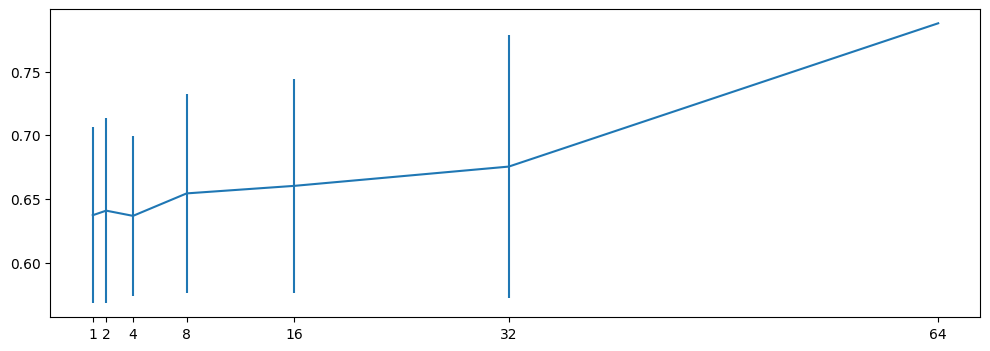

In [ ]:
width_scores = []
width_stds = []
for width in widths:
    scores = np.array([x[0] for x in results if x[3] == width])
    width_scores.append(np.average(scores))
    width_stds.append(scores.std())
plt.figure(figsize=(12, 4))
plt.errorbar(widths, width_scores, width_stds)
plt.xticks(widths)
plt.show()


# (max(avg_test_accs), str(elems), str(model), width, avg_losses, avg_test_accs)
#         0                1            2        3        4            5 

In [ ]:
print([type(r[6]) for r in results][6])
pass

IndexError: tuple index out of range